In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data uploading
titanic = pd.read_csv('titanic-passengers.csv',sep=';')

In [4]:
columns_to_drop = ['Name','PassengerId', 'Ticket', 'Cabin']
titanic = titanic.drop(columns_to_drop, axis = 1)

In [5]:
# We are going to use the pd.cut() function to categorize the column Age.

bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
titanic['Age'] = pd.cut(titanic['Age'], bins = bins, labels=labels)

In [6]:
titanic['Age'].fillna(titanic['Age'].mode()[0],inplace = True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)

In [7]:
dummies = ['Sex','Age', 'Embarked']
cleanup = {"Survived":{"Yes":1,"No":0}}
titanic.replace(cleanup, inplace = True)
one_hot = pd.get_dummies(titanic[dummies])

titanic = titanic.drop(dummies, axis=1)
titanic = pd.concat([titanic, one_hot], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
#Features extraction

x = titanic.drop('Survived', axis = 1) 
y = titanic['Survived']

#splitting data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm

model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7988826815642458


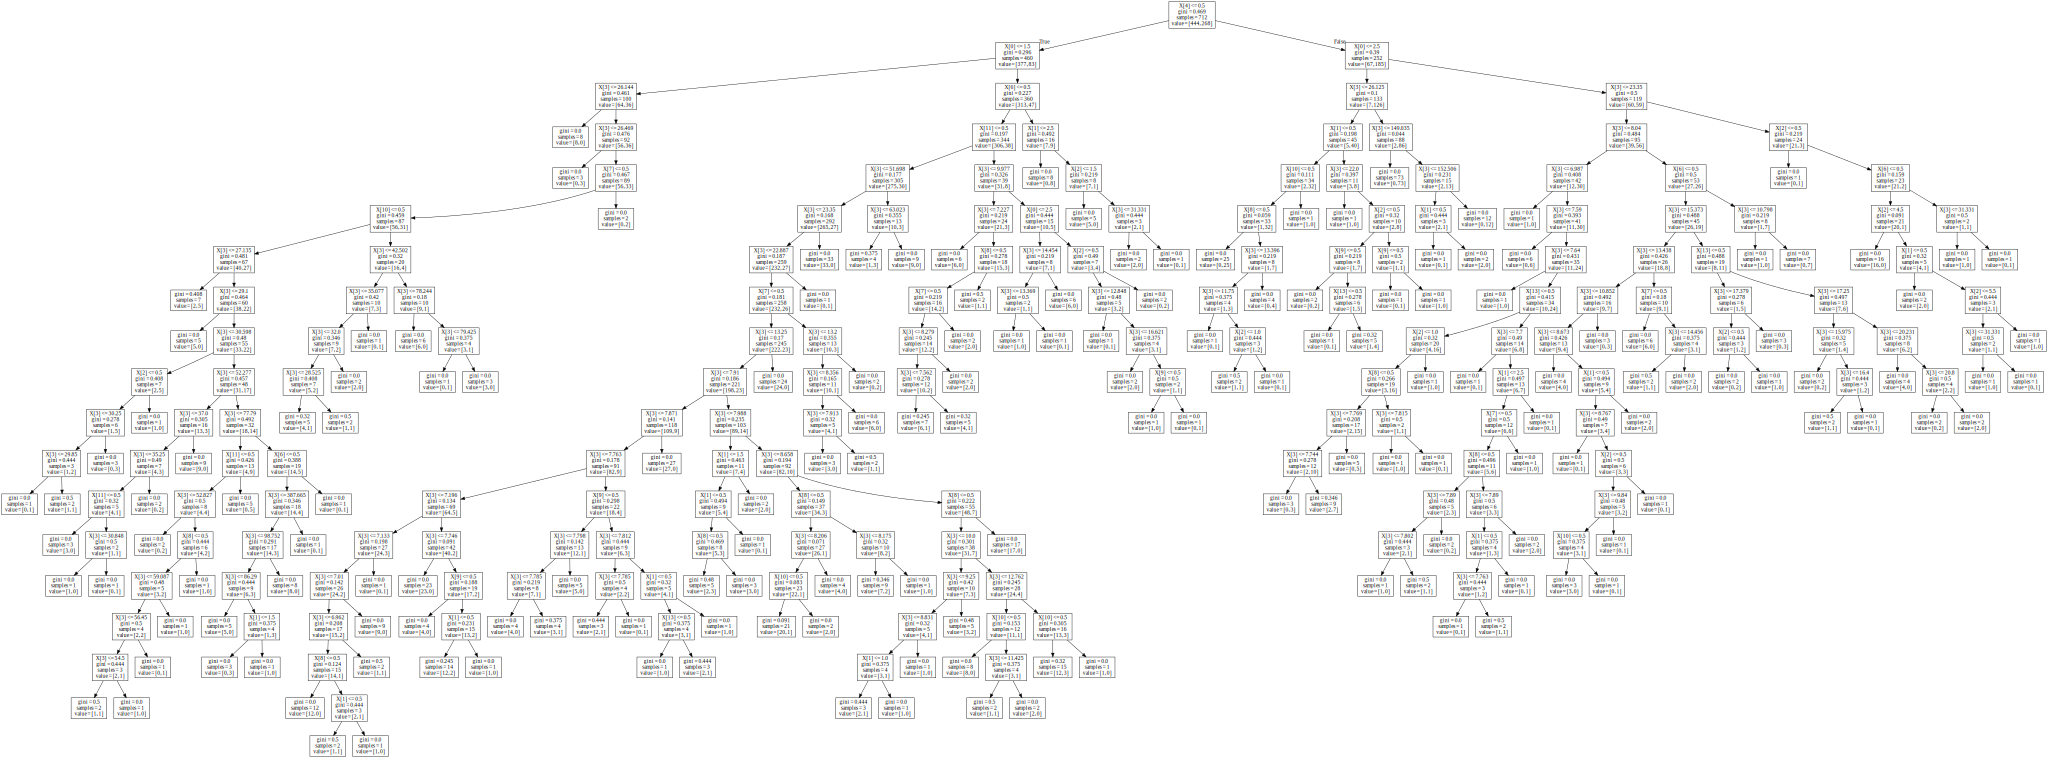

In [12]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph.size = "7.75,10.25"
graph

There are 444 survived according to the prediction. The first split was based on the sex. 377 men and 67 women survived. They were all from class 1 or 2.

In [13]:
model = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8603351955307262


The accuracy is better than the previous one

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # Importing metrics to test accuracy


clf=RandomForestClassifier(n_estimators=15)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8268156424581006


The accuracy is less than the last one